In [51]:
pwd

'C:\\Users\\AgrimDev'

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
df = pd.read_csv('global_ai_ml_data_salaries.csv')
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Business Intelligence,84021,USD,84021,CA,0,CA,M
1,2024,MI,FT,Business Intelligence,69000,USD,69000,CA,0,CA,M
2,2024,SE,FT,BI Developer,241600,USD,241600,US,0,US,M
3,2024,SE,FT,BI Developer,109800,USD,109800,US,0,US,M
4,2024,SE,FT,Machine Learning Modeler,245400,USD,245400,US,100,US,M


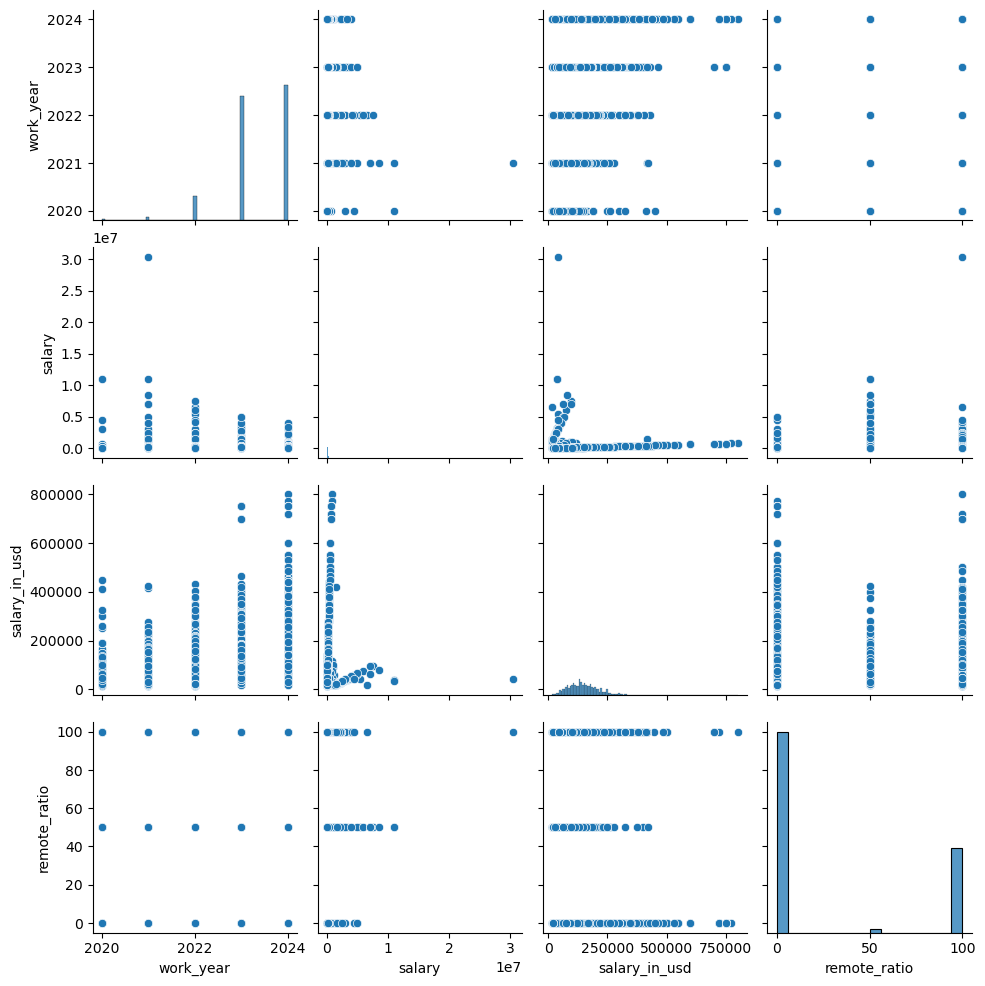

In [54]:
#TASK 1.1-EDA





#lets first plot all possible scenarios
print(sns.pairplot(df))


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

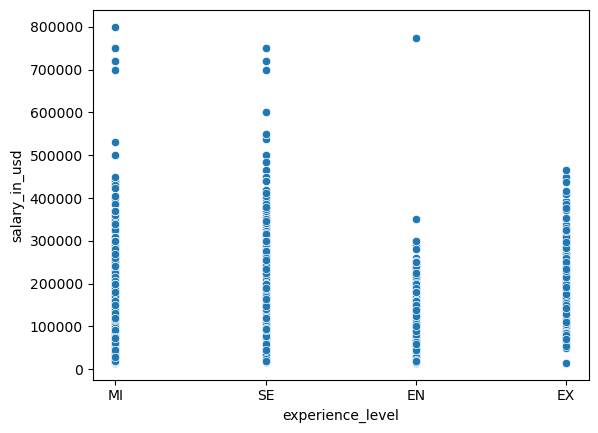

In [55]:
sns.scatterplot(df,x = 'experience_level',y = 'salary_in_usd')

In [56]:

cr = df.groupby(['experience_level'])['salary_in_usd'].mean()

<Axes: xlabel='experience_level'>

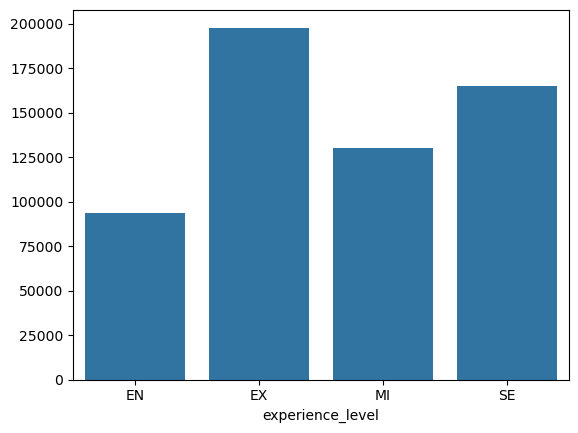

In [57]:
sns.barplot(x = cr.index,y =cr.values)
#INFERENCE 1-thus we can see that salary in usd is increasing when experience increases

In [58]:
#now to better understand relation of varibales to salaries lets plot all such graphs

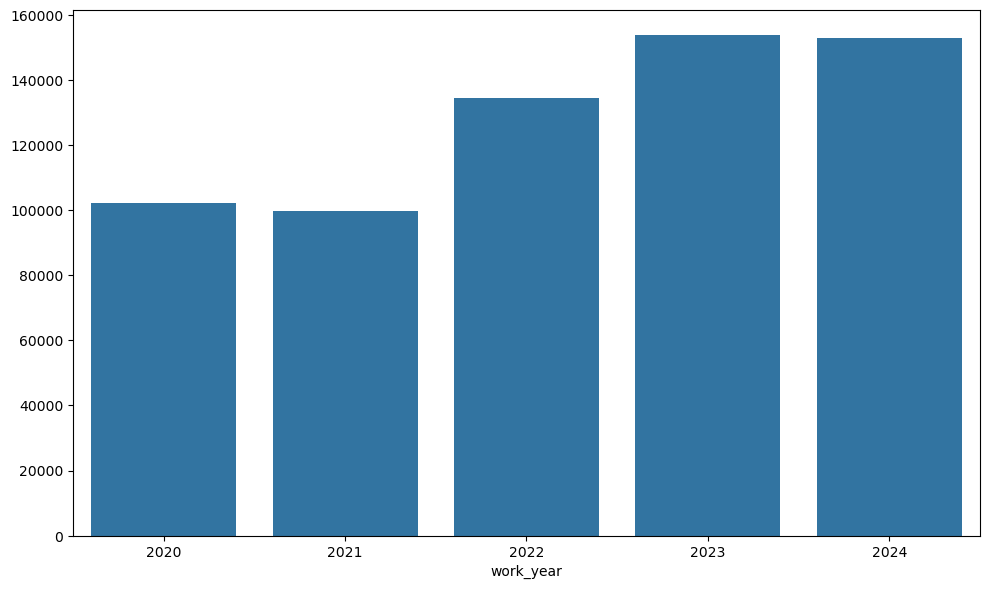

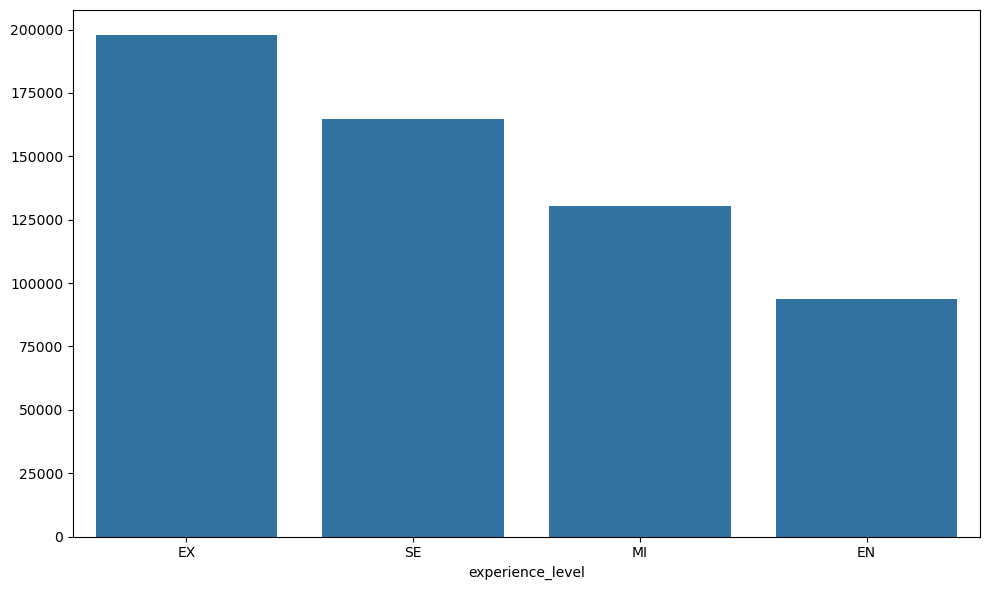

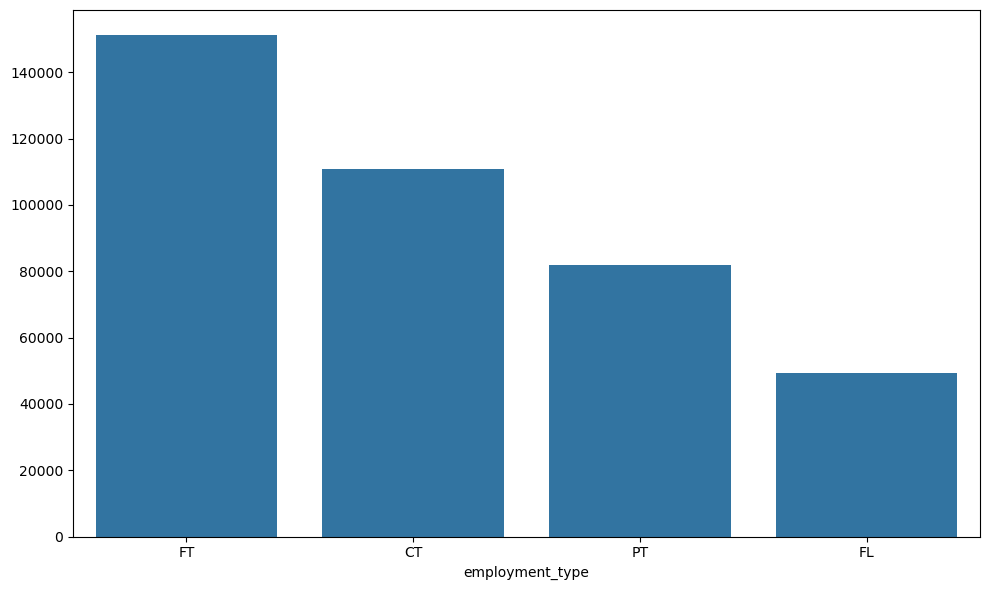

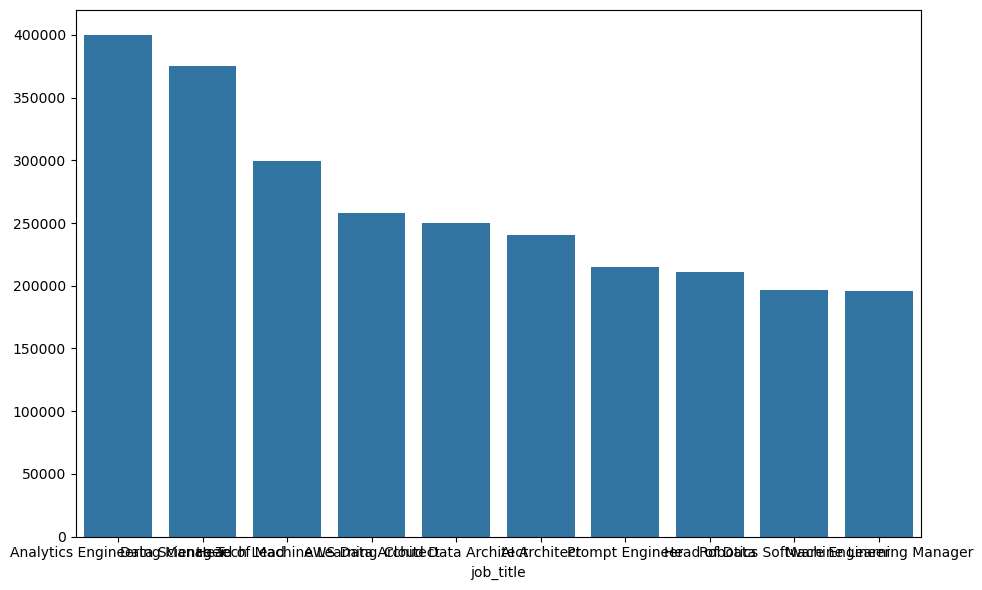

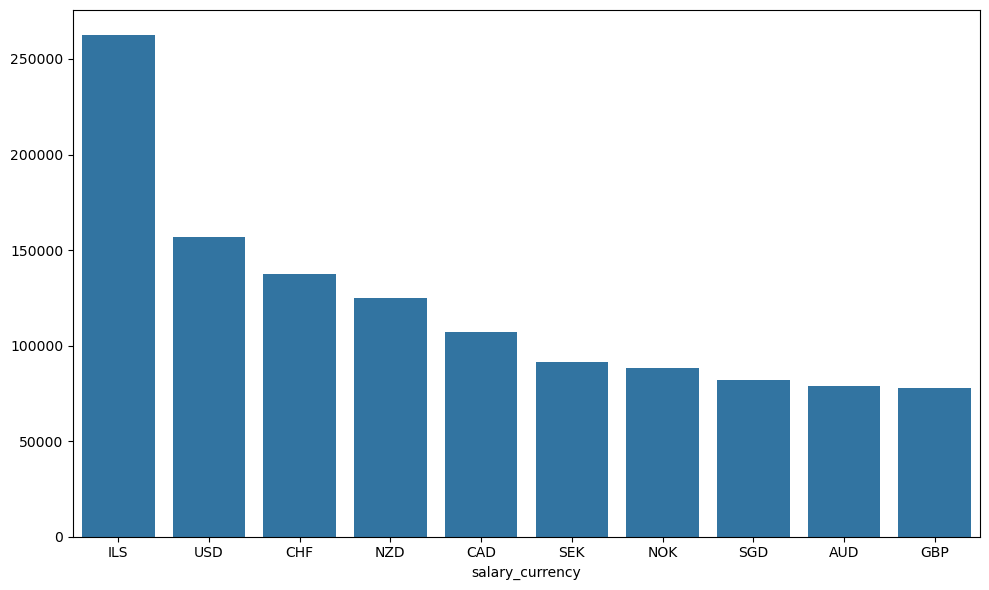

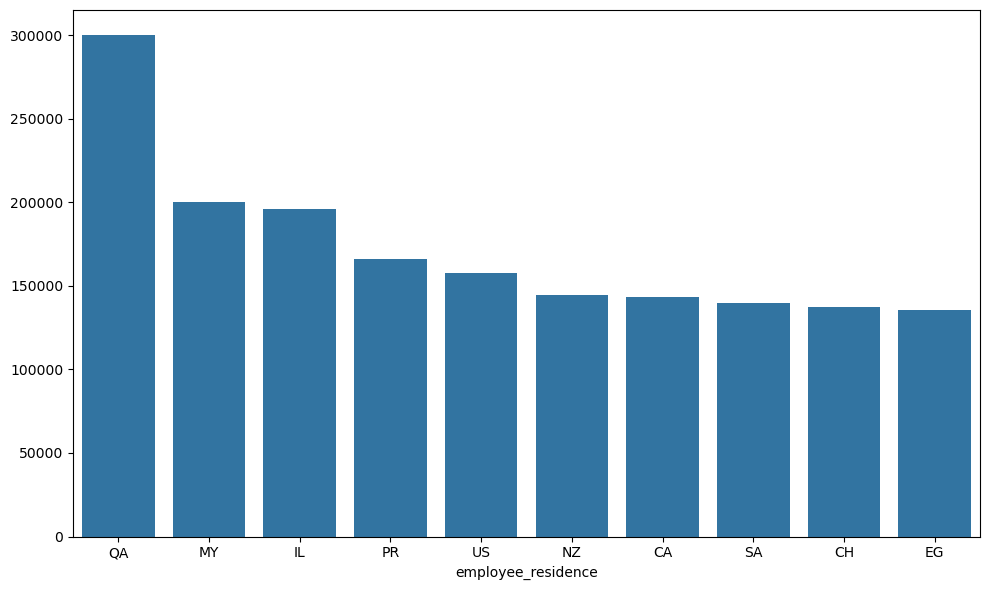

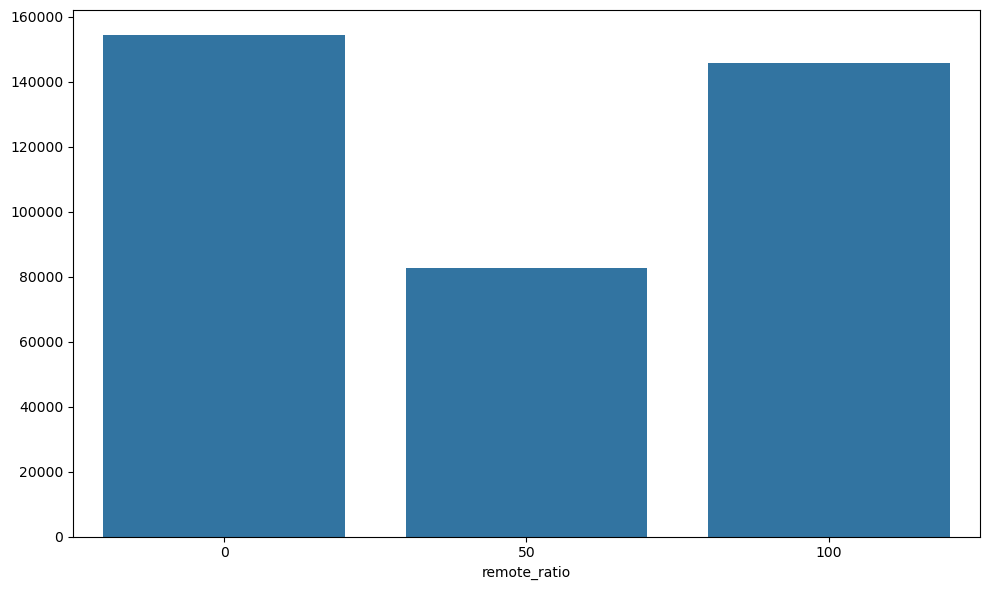

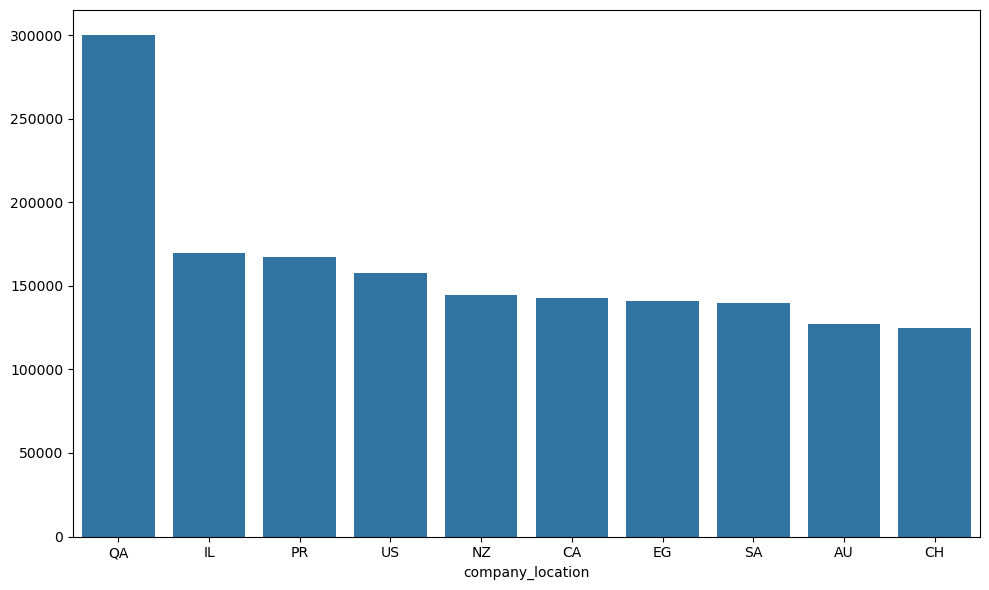

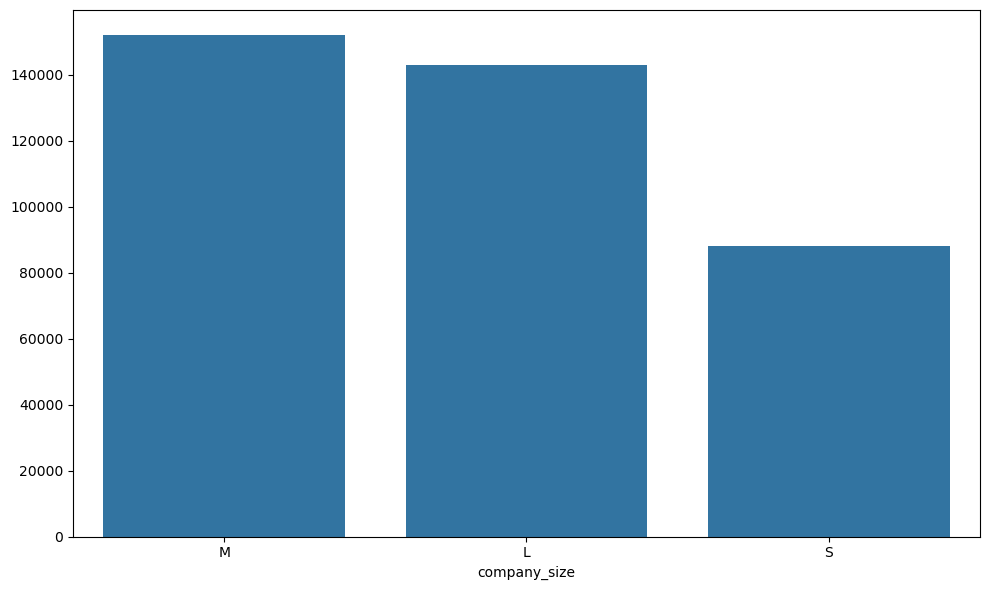

In [59]:
for i in df.drop(['salary_in_usd','salary'],axis = 1).columns:
    
    cr = df.groupby(i)['salary_in_usd'].mean().sort_values(ascending = False).head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x = cr.index,y =cr.values)
    plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
    plt.show()
    
    
    

In [60]:
#ok we can clearly see the relations between the columnns and salaries column from these seaborn plots



#INFERENCE 1-thus we can see that salary in usd is increasing when experience increases
#INFERENCE 2-We can see that although the order is same,the salaries are more compared to salaries in USD (as most of the -
#employees are from poorer economies) also ,the difference of salries between SE and MI has reduced
#INFERENCE 3-as we can see the people working 50 percent remotely have significantly less salary
#INFERENCE 4-There has been an increase in salary as time progress,except from 2023 to 2024 leading to lesser overall purchase power parity
#and so on............using plots we draw inferences.



#THUS, we can conclude that all columns that were plotted had a significant impact on salary,so we cant neglect any.
#however since we are trying to predict salay in usd,we will neglect SALARY column as the loacation is enough.



In [61]:

#TASK 1.2  -  Pre-processing



#now pre-processing,we will use one hot encoding for few columns with non ordinal values which have very few unique values

comp_size = pd.get_dummies(df['company_size'],drop_first=True)
rem_ratio = pd.get_dummies(df['remote_ratio'],drop_first=True)
work_y = pd.get_dummies(df['work_year'],drop_first=True)


In [62]:
num = len(df[df['company_location']!=df['employee_residence']])
num

132

In [63]:
#as num is very low(132 of 19975),99.33 percent  of the times the two columns represent same values,so we will get rid of 'employee_residence 'and 'salary currency' column as we are interested only in 'salary_in_usd'
df.drop(['employee_residence','salary_currency','salary'],axis = 1,inplace = True) 

In [64]:
#we will convert job title,company_location using Target encoding,in this case it gives better results than frequency encoding
list =  ['job_title','company_location']
for col in list:
    df[col] = df[col].apply(lambda x: df[df[col]==x]['salary_in_usd'].mean())


In [65]:
print(df)

       work_year experience_level employment_type      job_title  \
0           2024               MI              FT  143884.134615   
1           2024               MI              FT  143884.134615   
2           2024               SE              FT  106625.000000   
3           2024               SE              FT  106625.000000   
4           2024               SE              FT  182112.500000   
...          ...              ...             ...            ...   
19770       2020               SE              FT  157399.842207   
19771       2021               MI              FT  194089.600000   
19772       2020               EN              FT  157399.842207   
19773       2020               EN              CT   73567.761905   
19774       2021               SE              FT  157399.842207   

       salary_in_usd  remote_ratio  company_location company_size  
0              84021             0     142874.974170            M  
1              69000             0     142874.9

In [66]:
#columns-experience level and employement type have a ranking so we will use Ordinal Encoding-and give rank based on their index of sorted list
exp_ranking = ['EN','MI','SE','EX']
emp_type_ranking = ['FL','PT','CT','FT']

In [67]:
df['experience_level1']=df['experience_level'].apply(lambda x: exp_ranking.index(x))
df['employment_type1']=df['employment_type'].apply(lambda x: emp_type_ranking.index(x))


In [68]:
df.drop(['experience_level','employment_type'],axis = 1,inplace = True)

In [69]:
df

,work_year,job_title,salary_in_usd,remote_ratio,company_location,company_size,experience_level1,employment_type1
0,2024,143884.134615,84021,0,142874.974170,M,1,3
1,2024,143884.134615,69000,0,142874.974170,M,1,3
2,2024,106625.000000,241600,0,157734.754994,M,2,3
3,2024,106625.000000,109800,0,157734.754994,M,2,3
4,2024,182112.500000,245400,100,157734.754994,M,2,3
...,...,...,...,...,...,...,...,...
19770,2020,157399.842207,412000,100,157734.754994,L,2,3
19771,2021,194089.600000,151000,100,157734.754994,L,1,3
19772,2020,157399.842207,105000,100,157734.754994,S,0,3
19773,2020,73567.761905,100000,100,157734.754994,L,0,2


In [70]:
df = pd.concat([df,comp_size,rem_ratio,work_y],axis = 1)
#this to add columns of dummy variables
#and now removing redundant columns as boolean versions of these columns have been added


In [71]:
df.drop(['company_size','remote_ratio','work_year'],axis = 1,inplace = True)
#now we need to convert all column names to str to use train test split
df.columns = df.columns.map(str)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[['company_location','job_title']])
scaled_features = scaler.transform(df[['company_location','job_title']])
df[['company_location','job_title']] = scaled_features
df


,job_title,salary_in_usd,company_location,experience_level1,employment_type1,M,S,50,100,2021,2022,2023,2024
0,-0.240713,84021,-0.368252,1,3,True,False,False,False,False,False,False,True
1,-0.240713,69000,-0.368252,1,3,True,False,False,False,False,False,False,True
2,-1.512670,241600,0.310647,2,3,True,False,False,False,False,False,False,True
3,-1.512670,109800,0.310647,2,3,True,False,False,False,False,False,False,True
4,1.064331,245400,0.310647,2,3,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19770,0.220688,412000,0.310647,2,3,False,False,False,True,False,False,False,False
19771,1.473207,151000,0.310647,1,3,False,False,False,True,True,False,False,False
19772,0.220688,105000,0.310647,0,3,False,True,False,True,False,False,False,False
19773,-2.641182,100000,0.310647,0,2,False,False,False,True,False,False,False,False


In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('salary_in_usd',axis = 1),df['salary_in_usd'],test_size=0.45,random_state=101)


In [73]:
#TASK 1.3 - Implementing ML models



#now we can employ our ML Regression models
#1-Linear Regression
from sklearn.linear_model import LinearRegression
LinearReg = LinearRegression()
LinearReg.fit(x_train,y_train)

LinearRegression()

In [74]:
pred = LinearReg.predict(x_test)

In [75]:
from sklearn.metrics import r2_score,mean_squared_error
r2_score(y_test,pred)
#r2_score is 0.312

0.31151531147160083

In [76]:
from sklearn.preprocessing import PolynomialFeatures
#using polynomial linear regression
polynomial_features = PolynomialFeatures(degree=4)
x_poly_train = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.transform(x_test)
model = LinearRegression()
model.fit(x_poly_train, y_train)
y_train_pred = model.predict(x_poly_train)
y_test_pred = model.predict(x_poly_test)

# Model evaluation
print("Train R-squared:", r2_score(y_train, y_train_pred))
#r^2 score 0.35

Train R-squared: 0.35110903835364937


In [77]:
#model 2-Ridge Regression
from sklearn.linear_model import Ridge
rdeg = Ridge(alpha=0.1)
rdeg.fit(x_train,y_train)
#alpha = 0.1 gives best result in this case

y_pred = rdeg.predict(x_test)

# Evaluate the model performance
r2_score(y_test,y_pred)
#r2 score is 0.312

0.3115156412202035

In [78]:
from sklearn.linear_model import Lasso
#model -3 Lasso Rgression
lass = Lasso(alpha = 0.1)
lass.fit(x_train,y_train)
new_y_pred = lass.predict(x_test)
r2_score(y_test,new_y_pred)
#r2_score is 0.312

0.3115158469676228

In [79]:
#As we can see, there is not much difference in r2 score across models ,however polynomial model gives the best result of 35 %
#meaning there is a 35 % relationship between predictor and response variables.
#Since Ridge Regression and Lasso regression produced same accuracy in r2_score ,this means that there wasnt any overfitting and unimportant features were not used
#However lower r2 score suggest low relation by default between predictor and response.